# Prior Predictive Analysis for GARCH(1,1) Model

-  Step 1: Simulate hypothetical parameters iid via generated quantities block in Stan

- Step 2: Compute simulated data via the likelihood function (in Stan)

- Step 3: Compare simulated data with observed data to validate priors

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Current working directory: ", os.getcwd())

Current working directory:  c:\Users\nklatsky\econometrics\econometrics2024\project\code\garch


## Read in Real Data

In [3]:
# Read in the train-test split 
# Read train_test.csv
train_test_split = pd.read_csv("../../train_test.csv")
train_size = train_test_split['train'][0]
test_size = train_test_split['test'][0]

# Define data path:
data_path = "../../data/DXY_approx_percent_returns.csv"
real_data = pd.read_csv(data_path, index_col=0)
real_data = real_data - np.mean(real_data)

# calculate the splitting point as the train_size * len of data, rounded
split_point = int(train_size * len(real_data))

# Take training data range only
real_data = real_data.iloc[:split_point]
real_data


,DXY
Date,
1994-04-01,-0.435009
1994-05-01,0.030122
1994-06-01,0.247245
1994-07-01,-0.768186
1994-10-01,0.362673
...,...
2018-02-21,0.315110
2018-02-22,-0.294709
2018-02-23,0.162735


## Read in Generated Data

In [4]:
# Read in generated data from prior predictive distribution(y_sim_samples)

garch_y_sim_path = "sampler_outputs/y_sim_samples.csv"
garch_y_sim = pd.read_csv(garch_y_sim_path)
garch_y_sim

,0,1,2,3,4,5,6,7,8,9,...,6231,6232,6233,6234,6235,6236,6237,6238,6239,6240
0,1.525270,-1.510190,-0.924806,0.981446,-0.815832,0.426705,0.315960,0.870799,-0.070365,0.210760,...,-0.288151,0.011700,-1.049430,-0.250405,0.298655,-0.284530,1.133390,0.412197,0.550256,-0.729694
1,-0.669965,-1.885290,0.216870,-0.870049,0.816448,1.246130,0.204064,-0.607345,-0.185925,-0.732308,...,0.041572,0.038131,-0.758678,0.337189,0.287974,0.161295,-0.699193,0.078494,1.310910,0.482782
2,-0.018291,0.658863,1.097180,1.419090,-1.110610,1.541730,1.212300,0.294254,-1.400790,0.976512,...,-0.876932,-1.406750,-0.564039,0.062232,0.967750,-0.064105,1.658830,0.184307,0.322869,-1.655400
3,-1.909870,1.296180,0.896471,-1.855410,-0.628017,1.560700,-4.060980,-5.017120,-5.809190,-3.960550,...,-0.310352,-0.697930,-0.399750,-3.167030,1.071920,-2.640440,0.363775,-0.729973,1.670530,1.117010
4,-1.261190,0.608322,0.203711,0.237522,0.236255,0.129646,0.379717,0.003620,1.077170,0.672778,...,-0.699588,0.260183,-0.203539,-0.198211,0.168371,0.824154,0.429422,-0.742089,-0.581419,-1.151310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.009135,-0.160204,-0.140798,0.309784,0.397044,2.599850,-1.500740,-1.908140,1.318640,1.046110,...,0.453439,-0.497159,3.483410,0.875853,-0.620320,-1.316990,-2.723150,1.129540,-0.593886,0.153152
3996,1.893290,-1.510130,-0.371379,0.668181,-0.654442,0.254787,-0.491582,0.167027,-0.252301,-0.026218,...,0.000861,0.177858,-0.464187,-0.743604,0.359338,1.481190,0.915267,0.597065,-0.537861,-0.414910
3997,-1.083420,-1.738960,1.166900,-1.700010,1.559650,1.298440,0.065188,-0.357461,0.912296,-0.165768,...,1.475270,-0.240550,-0.482578,-0.051339,-1.014040,-0.273531,0.120798,-0.447343,0.667916,0.122111
3998,1.467760,0.180706,1.083140,0.636629,-0.869620,-0.905488,-0.105489,0.522231,-0.736487,-0.049546,...,0.192943,-0.709099,1.789740,-1.393880,1.986490,-0.394172,-0.139212,-1.461480,0.218361,-0.928778


In [5]:
# Read in the generated parameters to validate:

alpha1_sim_path = "sampler_outputs/alpha1_sim_samples.csv"
beta1_sim_path = "sampler_outputs/beta1_sim_samples.csv"
mu_sim_path = "sampler_outputs/mu_sim_samples.csv"
sigma_sim_path = "sampler_outputs/sigma_sim_samples.csv"

alpha1_sim = pd.read_csv(alpha1_sim_path)
beta1_sim = pd.read_csv(beta1_sim_path)
mu_sim = pd.read_csv(mu_sim_path)
sigma_sim = pd.read_csv(sigma_sim_path)




# Comparison

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.00424597556521391


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.0849623924869376


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -7.66848


Real max:  DXY    2.51896
dtype: float64
Simulated max:  5.95913




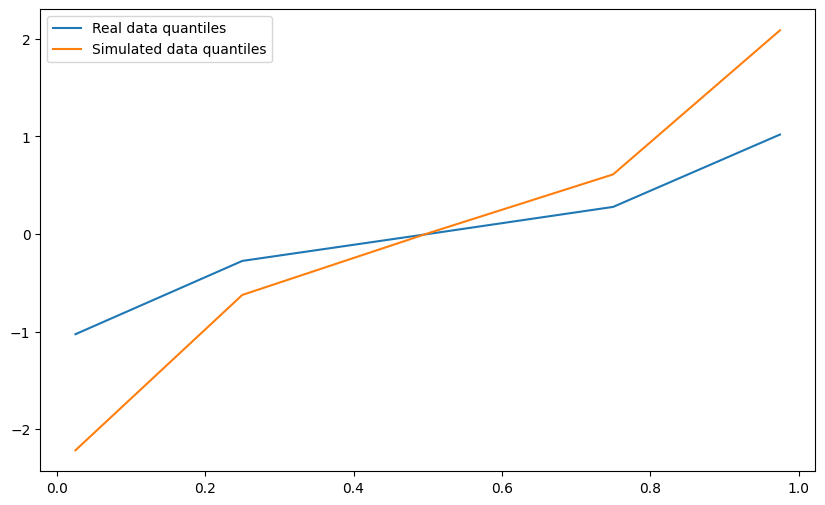

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.08224915874795705


Real std:  DXY    0.49879
dtype: float64
Simulated std:  3.506156060155774


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -13.8231


Real max:  DXY    2.51896
dtype: float64
Simulated max:  20.5771




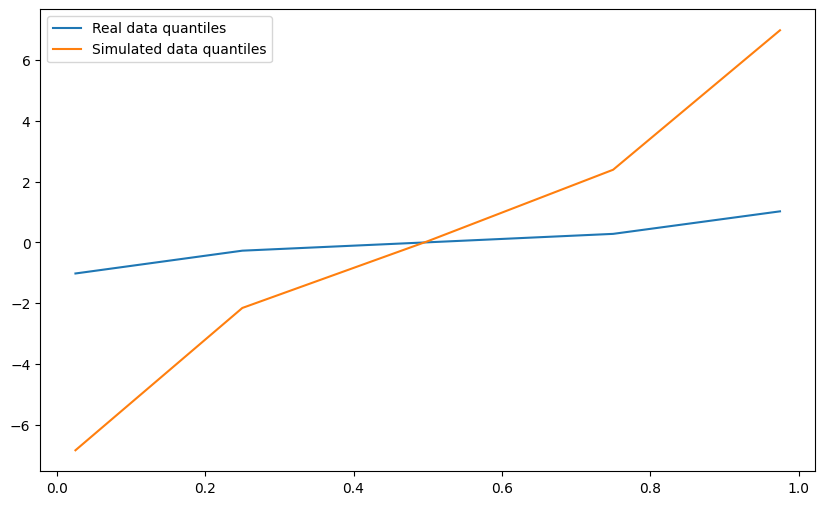

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.01034893247403301


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.7131309110798014


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -4.71468


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.65235




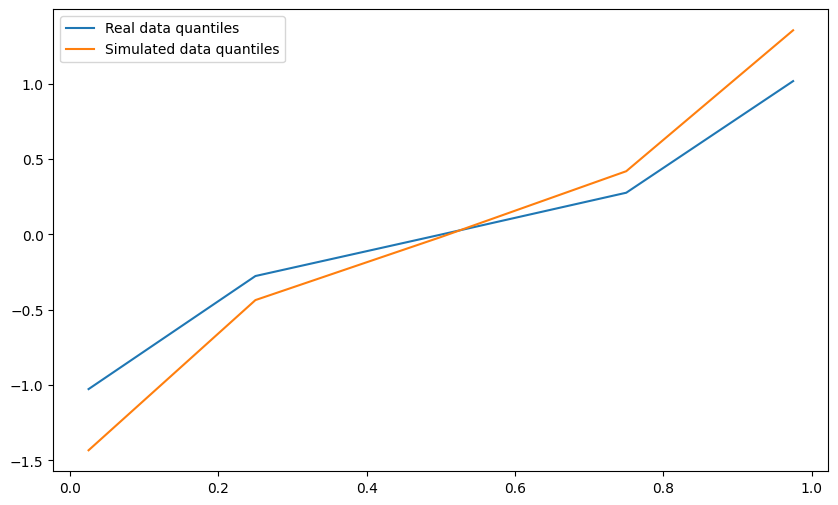

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.008004236438503447


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.741490053154852


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -8.55309


Real max:  DXY    2.51896
dtype: float64
Simulated max:  8.27079




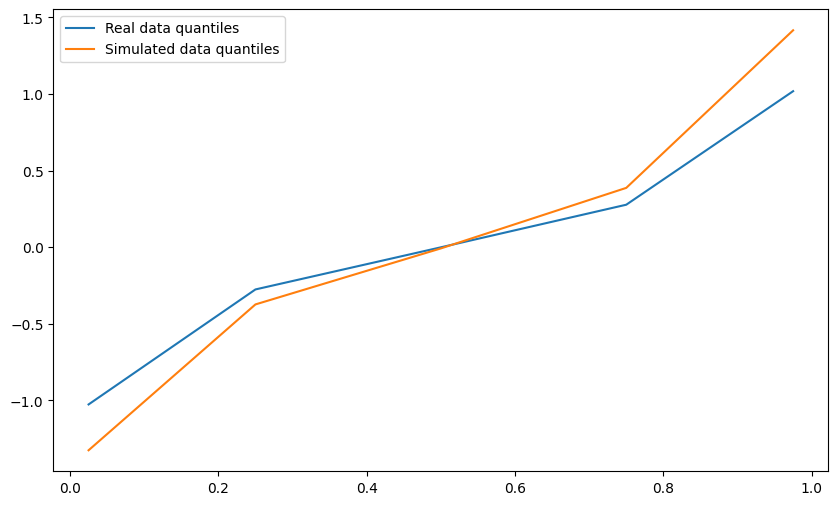

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.012789393524643488


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.7773607679670511


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -4.26153


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.7413




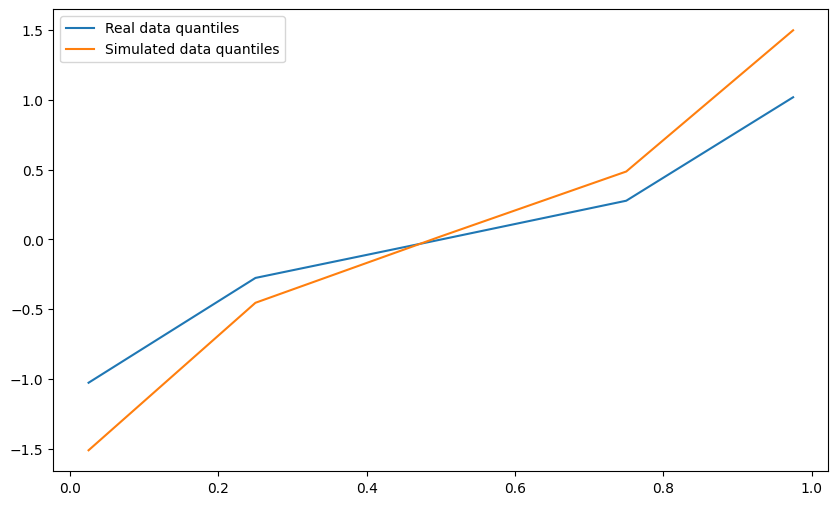

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.018396384845697805


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.7807866791042237


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -5.07816


Real max:  DXY    2.51896
dtype: float64
Simulated max:  5.64473




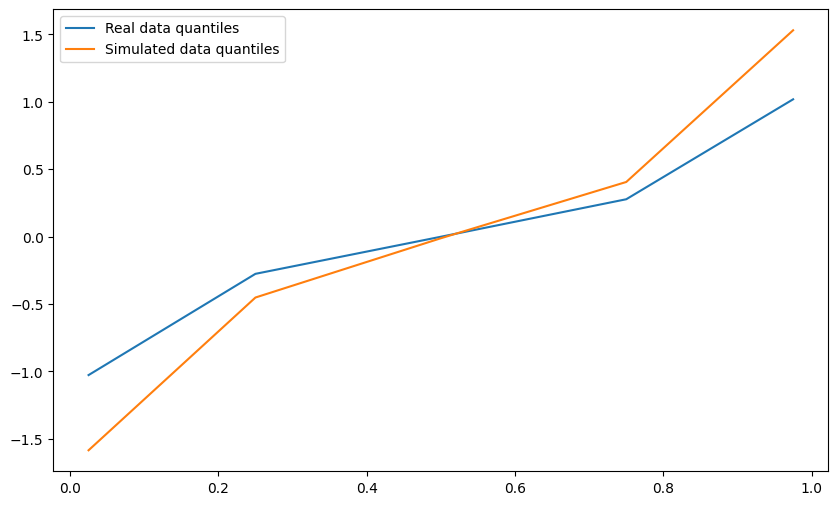

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.0101766402956257


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.1213202966727875


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -7.49116


Real max:  DXY    2.51896
dtype: float64
Simulated max:  9.65455




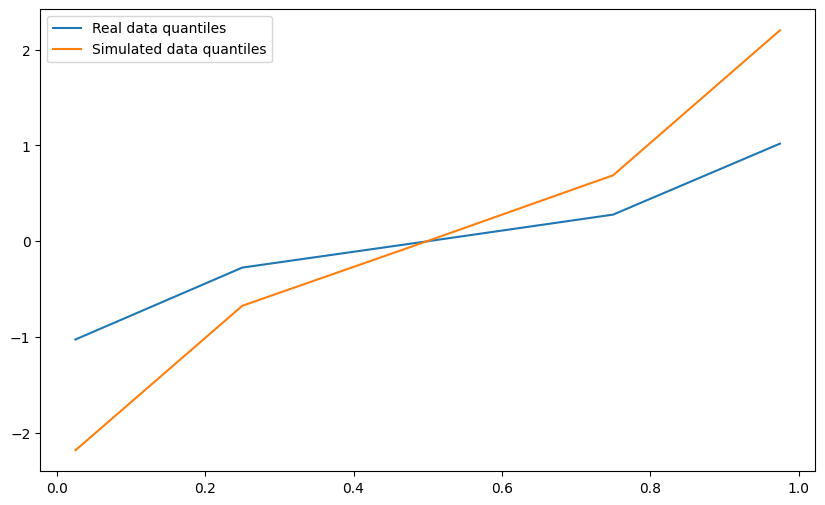

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.01912628348788655


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.516683824761587


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -12.5402


Real max:  DXY    2.51896
dtype: float64
Simulated max:  17.7386




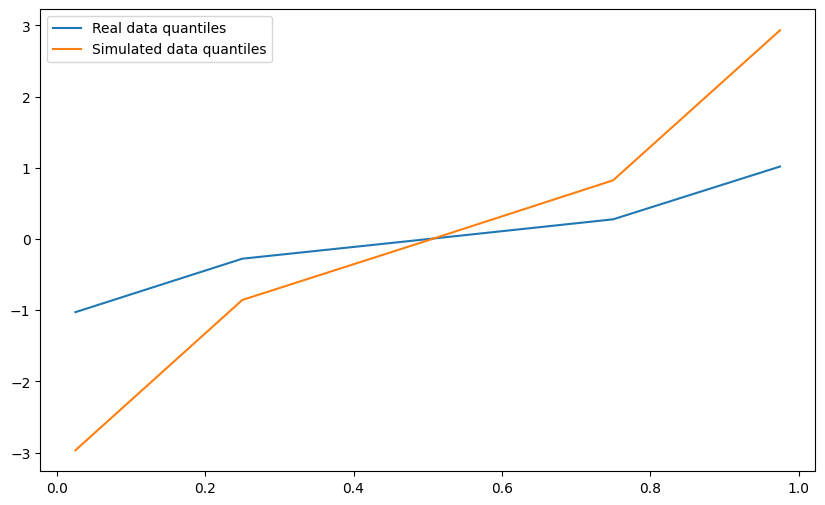

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.004005149714372698


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.602794717972262


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -3.83094


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.42554




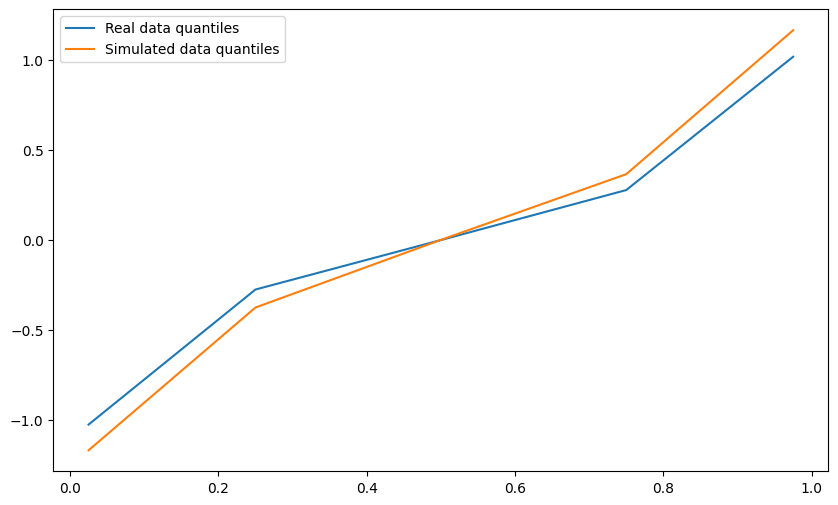

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.0051559478486780976


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.0000385781219159


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -6.11684


Real max:  DXY    2.51896
dtype: float64
Simulated max:  6.60241




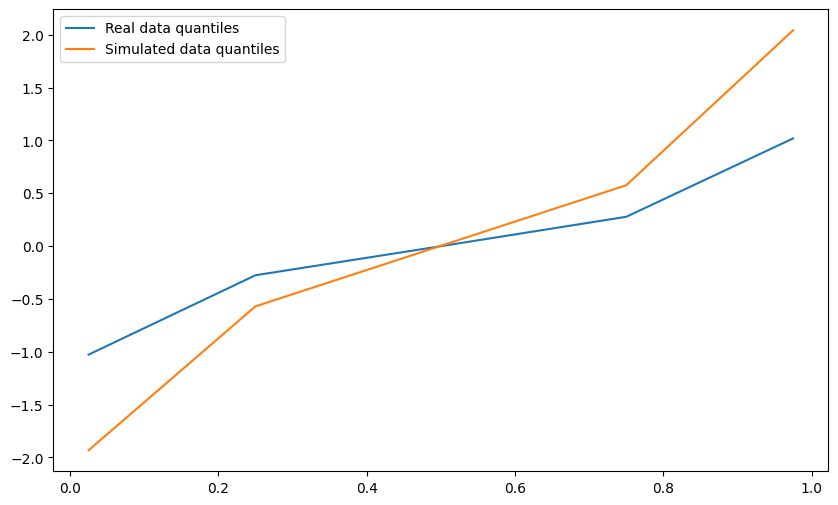

In [6]:
# Loop through rows in garch_y_sim (which each represent a simulated time series) and calculate the mean, stddev, and quantiles. Then compare to the real data.

real_mean = real_data.mean()
real_std = real_data.std()
real_quantiles = real_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
real_min = real_data.min()
real_max = real_data.max()

simulated_means = []
simulated_stds = []
simulated_quantiles = []
simulated_mins = []
simulated_maxs = []

for row in range(garch_y_sim.shape[0]):
    sim_data = garch_y_sim.iloc[row]

    sim_mean = sim_data.mean()
    sim_std = sim_data.std()
    sim_quantiles = sim_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
    sim_min = sim_data.min()
    sim_max = sim_data.max()

    simulated_means.append(sim_mean)
    simulated_stds.append(sim_std)
    simulated_quantiles.append(sim_quantiles)
    simulated_mins.append(sim_min)
    simulated_maxs.append(sim_max)

# Plot for comparison at select indices:
indices = [row for row in range(0, len(simulated_means), len(simulated_means)//10)]

for idx in indices:
    sim_mean = simulated_means[idx]
    sim_std = simulated_stds[idx]
    sim_quantiles = simulated_quantiles[idx]
    sim_min = simulated_mins[idx]
    sim_max = simulated_maxs[idx]


    print("Real mean: ", real_mean)
    print("Simulated mean: ", sim_mean)
    print("\n")

    print("Real std: ", real_std)
    print("Simulated std: ", sim_std)
    print("\n")

    print("Real min: ", real_min)
    print("Simulated min: ", sim_min)
    print("\n")

    print("Real max: ", real_max)
    print("Simulated max: ", sim_max)
    print("\n")

    # Plot quantiles
    plt.figure(figsize=(10, 6))
    plt.plot(real_quantiles, label="Real data quantiles")
    plt.plot(sim_quantiles, label="Simulated data quantiles")
    plt.legend()

    plt.show()




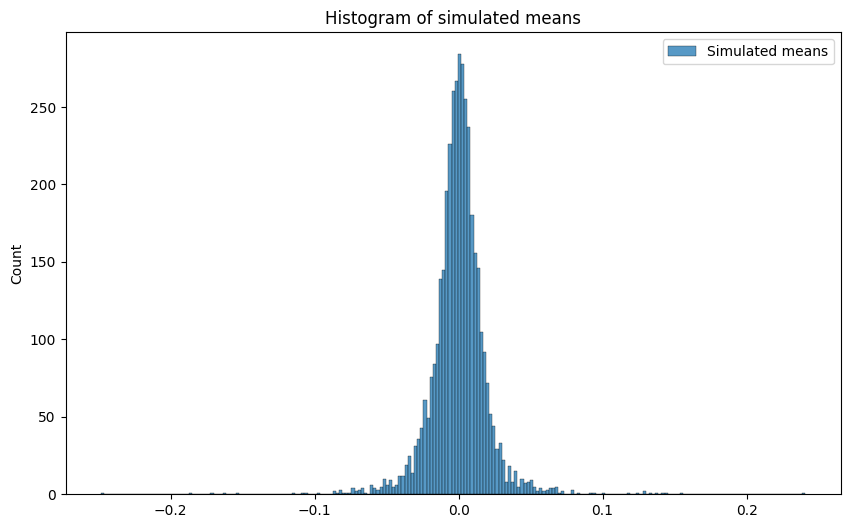

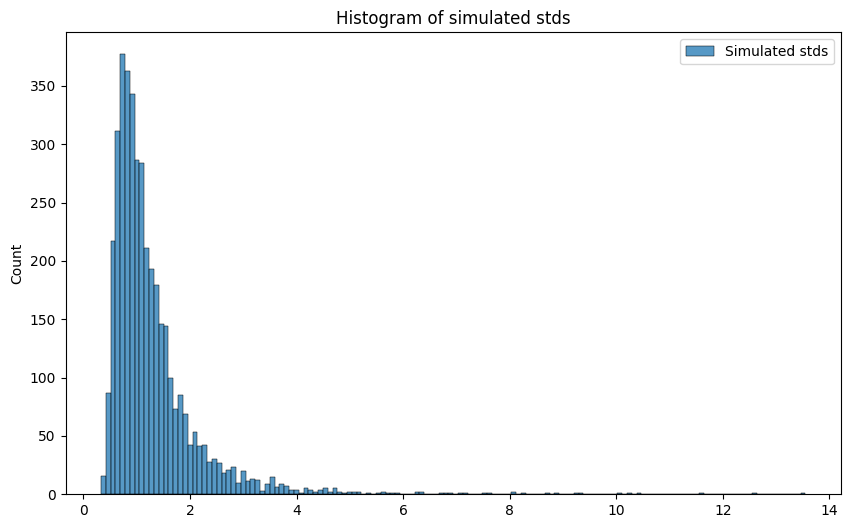

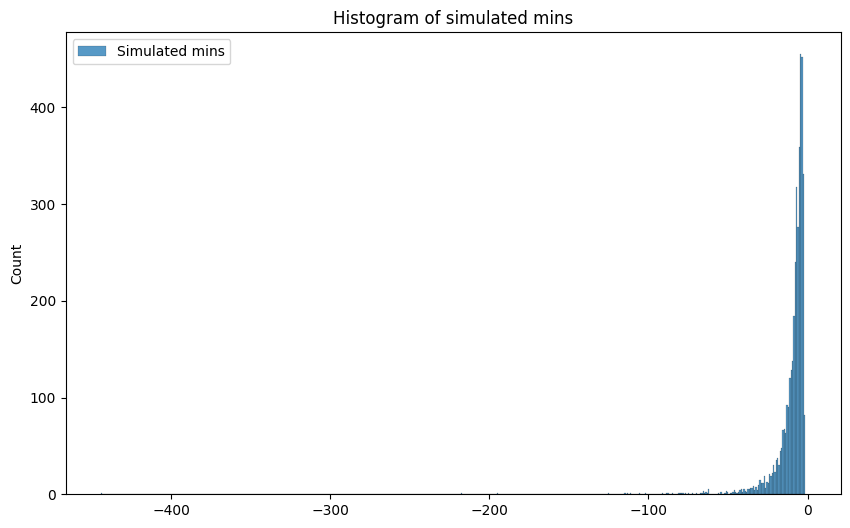

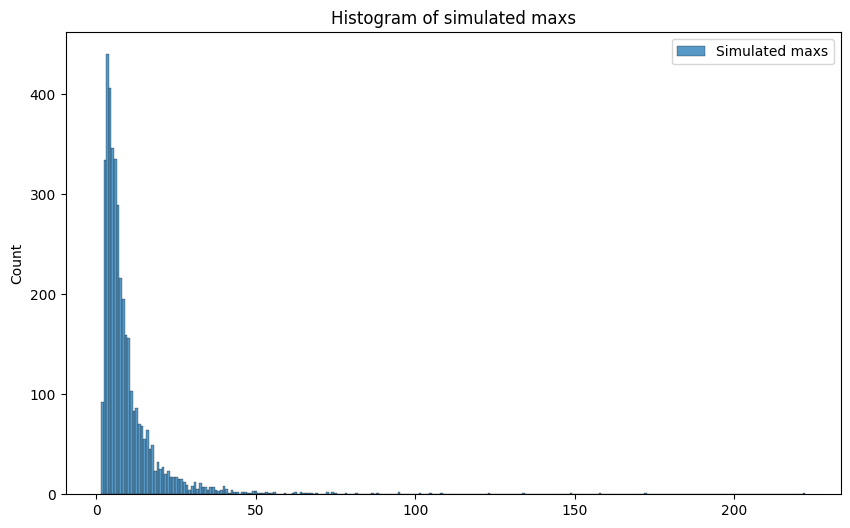

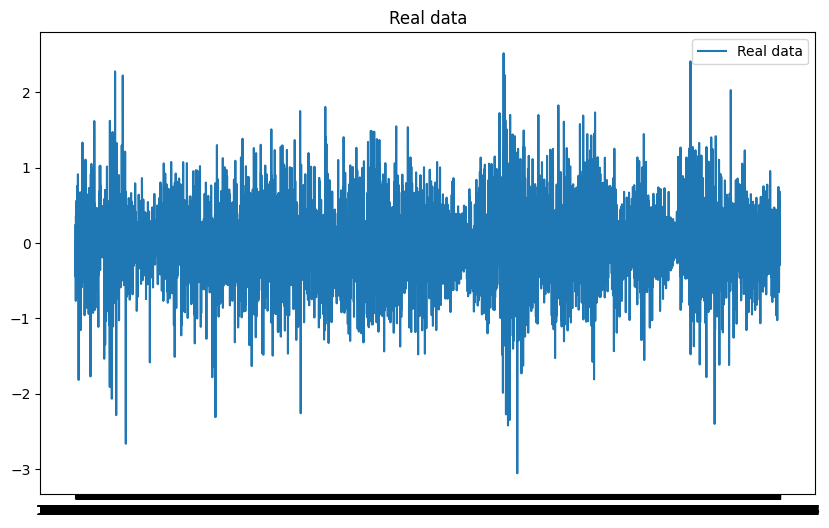

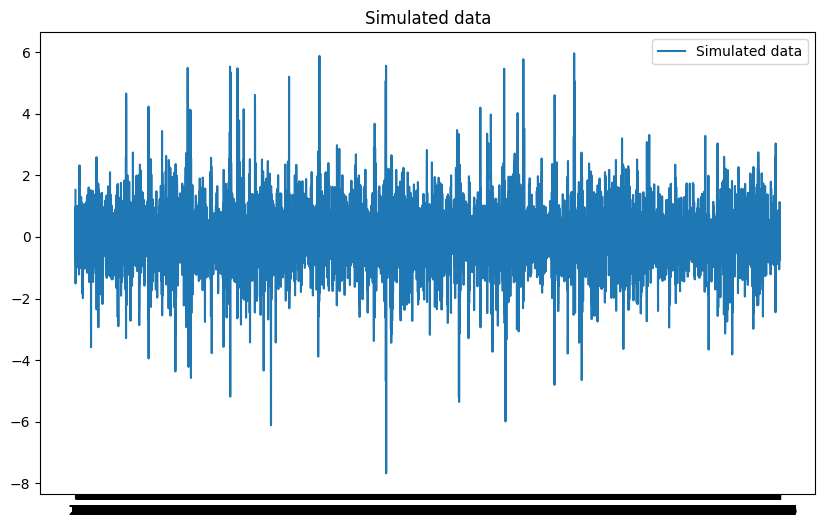

In [9]:
# Plot histograms of the means and stds
plt.figure(figsize=(10, 6))
sns.histplot(simulated_means, label="Simulated means")
plt.title("Histogram of simulated means")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(simulated_stds, label="Simulated stds")
plt.title("Histogram of simulated stds")
plt.legend()
plt.show()

# Plot histograms of the mins and maxs
plt.figure(figsize=(10, 6))
sns.histplot(simulated_mins, label="Simulated mins")
plt.title("Histogram of simulated mins")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(simulated_maxs, label="Simulated maxs")
plt.title("Histogram of simulated maxs")
plt.legend()
plt.show()

# Plot the real data and simulated data for comparison
plt.figure(figsize=(10, 6))
plt.plot(real_data, label="Real data")
plt.title("Real data")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(garch_y_sim.iloc[0], label="Simulated data")
plt.title("Simulated data")
plt.legend()
plt.show()





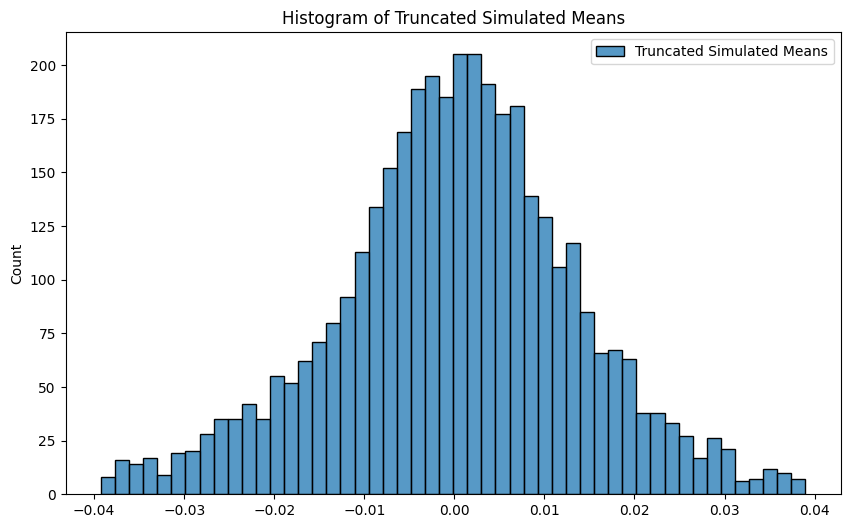

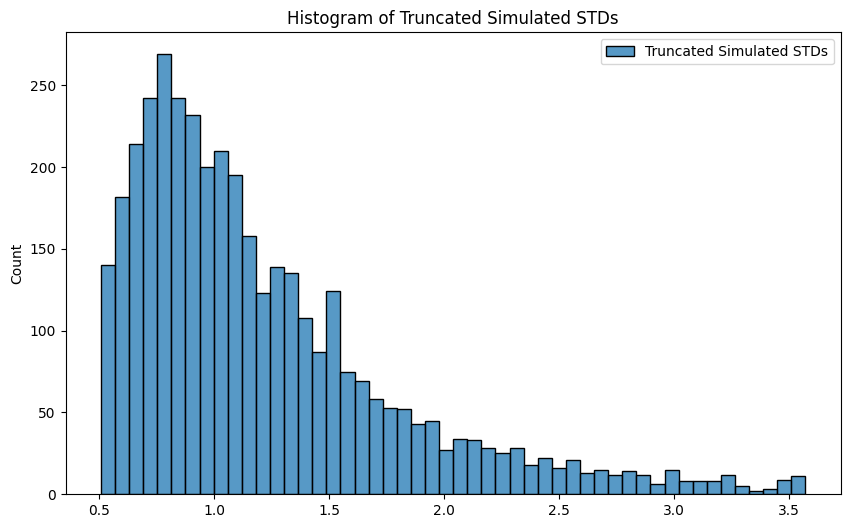

In [8]:
# Create truncated histograms of the means and stds
# Convert to NumPy arrays if not already (assuming they might be lists or pandas Series)
simulated_means = np.array(simulated_means)
simulated_stds = np.array(simulated_stds)
simulated_mins = np.array(simulated_mins)
simulated_maxs = np.array(simulated_maxs)

# Calculate quantiles
q_low = 0.025
q_high = 0.975

low_quantile_means = np.quantile(simulated_means, q_low)
high_quantile_means = np.quantile(simulated_means, q_high)
truncated_simulated_means = simulated_means[(simulated_means > low_quantile_means) & (simulated_means < high_quantile_means)]

low_quantile_stds = np.quantile(simulated_stds, q_low)
high_quantile_stds = np.quantile(simulated_stds, q_high)
truncated_simulated_stds = simulated_stds[(simulated_stds > low_quantile_stds) & (simulated_stds < high_quantile_stds)]

low_quantile_mins = np.quantile(simulated_mins, q_low)
high_quantile_mins = np.quantile(simulated_mins, q_high)
truncated_simulated_mins = simulated_mins[(simulated_mins > low_quantile_mins) & (simulated_mins < high_quantile_mins)]

low_quantile_maxs = np.quantile(simulated_maxs, q_low)
high_quantile_maxs = np.quantile(simulated_maxs, q_high)
truncated_simulated_maxs = simulated_maxs[(simulated_maxs > low_quantile_maxs) & (simulated_maxs < high_quantile_maxs)]

# Plot histograms of the truncated means and stds
plt.figure(figsize=(10, 6))
sns.histplot(truncated_simulated_means, label="Truncated Simulated Means", bins=50)
plt.title("Histogram of Truncated Simulated Means")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(truncated_simulated_stds, label="Truncated Simulated STDs", bins=50)
plt.title("Histogram of Truncated Simulated STDs")
plt.legend()
plt.show()